In [1]:
import pandas as pd
import numpy as np 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error,max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('emdat_with_precipitation.csv')

In [3]:
dataset.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Rainfall-MM
0,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300,91.8369
1,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300,34.7374
2,1926-0008-IND,1926,8,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,OFDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.940236,294.4590
3,1927-0012-DZA,1927,12,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.809780,20.3177
4,1928-0018-IND,1928,18,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,36.0,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,6.731507,108.1400


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           4509 non-null   object 
 1   Year                             4509 non-null   int64  
 2   Seq                              4509 non-null   int64  
 3   Disaster Group                   4509 non-null   object 
 4   Disaster Subgroup                4509 non-null   object 
 5   Disaster Type                    4509 non-null   object 
 6   Disaster Subtype                 3194 non-null   object 
 7   Disaster Subsubtype              0 non-null      float64
 8   Event Name                       9 non-null      object 
 9   Entry Criteria                   4508 non-null   object 
 10  Country                          4509 non-null   object 
 11  ISO                              4509 non-null   object 
 12  Region              

In [5]:
dataset.shape

(4509, 44)

In [6]:
# Showing missing data
dataset.isna().sum()

Dis No                                0
Year                                  0
Seq                                   0
Disaster Group                        0
Disaster Subgroup                     0
Disaster Type                         0
Disaster Subtype                   1315
Disaster Subsubtype                4509
Event Name                         4500
Entry Criteria                        1
Country                               0
ISO                                   0
Region                                0
Continent                             0
Location                            233
Origin                             1993
Associated Dis                     3563
Associated Dis2                    4403
OFDA Response                      3917
Appeal                             3914
Declaration                        3702
Aid Contribution                   4176
Dis Mag Value                      2935
Dis Mag Scale                         0
Latitude                           3682


In [25]:
# Descriptives stats
dataset.describe()

,Year,Seq,Disaster Subsubtype,Aid Contribution,Dis Mag Value,Latitude,Longitude,Local Time,Start Year,Start Month,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Rainfall-MM
count,4509.000000,4509.000000,0.0,333.000000,1.574000e+03,827.000000,832.000000,0.0,4509.000000,4509.000000,...,3.297000e+03,677.000000,3.208000e+03,8.360000e+02,3.739000e+03,9.000000e+00,1.980000e+02,1.586000e+03,4509.000000,4509.000000
mean,1998.837880,300.509204,NaN,5836.276276,9.113733e+04,18.693626,34.270966,NaN,1998.837880,6.725882,...,2.028012e+03,1971.946824,1.123782e+06,1.042595e+05,9.878543e+05,3.246548e+05,3.494099e+05,4.688521e+05,66.568396,159.505522
std,14.479451,211.741580,NaN,21133.805449,2.143703e+05,71.464493,115.450890,NaN,14.479466,3.164844,...,7.376540e+04,15968.123068,9.062673e+06,7.056659e+05,8.596023e+06,5.080652e+05,8.456258e+05,1.917578e+06,22.955774,123.244243
min,1906.000000,1.000000,NaN,5.000000,2.000000e+00,-832.104000,-955.370000,NaN,1906.000000,1.000000,...,1.000000e+00,1.000000,2.000000e+01,9.000000e+00,2.000000e+00,8.400000e+01,2.000000e+02,3.000000e+00,3.522300,0.000000
25%,1993.000000,110.000000,NaN,147.000000,3.734000e+03,0.952800,-4.262500,NaN,1993.000000,4.000000,...,6.000000e+00,12.000000,2.248750e+03,1.250000e+03,2.000000e+03,3.000000e+03,4.425000e+04,5.372500e+03,56.504646,63.307700
50%,2003.000000,273.000000,NaN,655.000000,2.298000e+04,16.004000,39.850000,NaN,2003.000000,7.000000,...,1.900000e+01,35.000000,1.500000e+04,5.000000e+03,1.200000e+04,1.000000e+04,1.225000e+05,4.400000e+04,71.955007,126.313000
75%,2009.000000,467.000000,NaN,2920.000000,7.918150e+04,34.090000,99.765000,NaN,2009.000000,9.000000,...,5.100000e+01,117.000000,1.047750e+05,2.384850e+04,9.172800e+04,5.380000e+05,3.650000e+05,2.450000e+05,84.215229,234.633000
max,2016.000000,920.000000,NaN,234100.000000,2.857000e+06,995.267000,952.600000,NaN,2016.000000,12.000000,...,3.700000e+06,249378.000000,2.230000e+08,1.585000e+07,2.389730e+08,1.440751e+06,1.000000e+07,4.000000e+07,93.878436,1135.850000


In [7]:
nb_floods_year_region = dataset[['Year','Region','Dis No']].groupby(by=['Region','Year']).count()
nb_floods_year_region.head(30)

Rainfall_year_region = dataset[['Year','Region','Rainfall-MM']].groupby(by=['Region','Year']).sum()
Rainfall_year_region.head(40)

Criteria_year_region = dataset[['Year','Region','Entry Criteria']].groupby(by=['Region','Year']).sum()
Criteria_year_region.head(25)

Region                     Year                
Australia and New Zealand  1938  Entry Criteria                                          Kill
                           1955  Entry Criteria                                          Kill
                           1971  Entry Criteria                                          Kill
                           1973  Entry Criteria                                          Kill
                           1974  Entry Criteria                                          Kill
                           1975  Entry Criteria                                        Govern
                           1976  Entry Criteria                                  AffectAffect
                           1977  Entry Criteria                                  GovernAffect
                           1978  Entry Criteria                GovernGovernAffectAffectAffect
                           1980  Entry Criteria                                  AffectAffect
            

In [8]:
region_data=nb_floods_year_region.merge(Rainfall_year_region, how='inner', right_on=['Region','Year'], left_on=['Region','Year'])
region_data.columns=np.array(['number of floods','total rainfall MM'])
region_data.head(30)

region_data=region_data.reset_index()
region_data.head(20)

,Region,Year,number of floods,total rainfall MM
0,Australia and New Zealand,1938,1,211.8300
1,Australia and New Zealand,1955,1,108.1940
2,Australia and New Zealand,1971,1,77.0188
3,Australia and New Zealand,1973,1,86.5495
4,Australia and New Zealand,1974,1,219.8190
5,Australia and New Zealand,1975,1,66.2571
6,Australia and New Zealand,1976,2,279.7542
7,Australia and New Zealand,1977,2,239.1561
8,Australia and New Zealand,1978,5,605.3286
9,Australia and New Zealand,1980,2,365.5460


In [9]:
region_dict={}
counter=0
for region in region_data['Region'].unique():
    region_dict[region]=counter
    counter+=1
region_dict

region_data['Region'] = region_data['Region'].apply(lambda x: region_dict[x])
region_data=shuffle(region_data)
region_data

,Region,Year,number of floods,total rainfall MM
637,17,1969,2,625.06820
298,7,1986,1,565.96000
791,20,1998,7,302.18884
105,2,1988,5,1905.71000
16,0,1988,5,640.16290
...,...,...,...,...
594,16,1985,1,148.32600
701,18,1983,3,436.63870
774,20,1965,1,61.95510
399,11,1936,1,44.58020


In [10]:
X=region_data[['Region','Year','total rainfall MM']]
Y=region_data[['number of floods']]

In [11]:
split_index=(X.shape[0])*2//3
X_train=X.iloc[:split_index,:]
X_test=X.iloc[split_index:,:]
Y_train=Y.iloc[:split_index,:]
Y_train=np.array(Y_train).ravel()
Y_test=Y.iloc[split_index:,:]
Y_test=np.array(Y_test).ravel()

In [12]:
# Regression using simple regression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print(Y_pred)
# Model evaluation SR
print('mean_squared_error',mean_squared_error(Y_test, Y_pred))
print('max_error', max_error(Y_test, Y_pred))
print('mean_absolute_error', mean_absolute_error(Y_test, Y_pred))
print('r2_score', r2_score(Y_test, Y_pred))

[ 3.87872875e+00  1.75718164e+00  1.62234458e+01  4.54084016e+00
  4.38749226e+00  3.83772265e+00  4.28432753e+00  6.19322237e+00
  2.64701802e+00  1.29998466e+00  2.20577652e-01  4.60460003e-01
  2.94632126e+00  2.86762123e+00  3.13910222e+00  8.97321524e-02
  5.97974495e+00  1.07032635e+01  5.50627245e+00  1.99342559e+01
  2.73001987e-01  3.58619772e+00  4.64433532e+00  4.11233565e+00
  1.79259839e+00  3.38956674e+00  8.13621612e+00  2.39239861e+00
  2.80121408e+01  3.26670838e-01  3.08613725e+00  3.98925190e+00
  2.50272433e+00  3.01340783e+00  2.18603720e+00  4.16708682e+00
  8.50283397e+00  3.07264338e+00  2.67711966e+00  6.54655226e+00
  6.24410437e+00  2.49883608e+00  5.08788380e+00  3.77131812e+00
  1.47951118e+01 -2.86805770e-01  6.22349239e+00  1.92153156e+01
  7.54012287e+00  4.35873647e+00  1.97689622e+01  2.11126284e+00
  9.77177248e+00  4.70281613e+00  1.03848582e+00  1.73253585e+00
  3.89417371e+00  3.18652978e+00  2.33388710e+00  2.21176910e+00
  6.25595409e+00  1.03141

In [13]:
# Regression using Decision Tree
regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print(Y_pred)
# Model evaluation DT
print('mean_squared_error',mean_squared_error(Y_test, Y_pred))
print('max_error', max_error(Y_test, Y_pred))
print('mean_absolute_error', mean_absolute_error(Y_test, Y_pred))
print('r2_score', r2_score(Y_test, Y_pred))

[ 4.  1. 14.  4.  6.  1.  6.  2.  3.  2.  1.  1.  3.  1.  2.  2.  3. 15.
  5. 19.  1.  2.  2.  6.  1.  7.  6.  1. 26.  2.  2.  3.  2.  3.  1.  1.
  7.  1.  1.  8.  6.  1.  6.  2. 17.  1.  6. 26.  8.  6. 27.  2.  9.  3.
  3.  2.  1.  4.  3.  2.  5. 10.  7.  1.  6.  7.  3.  4.  1.  1.  9.  8.
  3.  2. 19.  1.  7.  2.  6.  5.  2.  6.  3.  2.  2.  4. 22.  3.  3.  8.
  6.  4.  1.  3.  4.  1.  1.  1.  1.  1.  2.  4.  6.  1.  1.  3.  4.  1.
  3.  3.  1.  1.  5.  3. 12.  2.  1.  1.  8. 12.  4.  3.  1. 22.  8. 11.
 13. 26.  1. 16.  1.  8.  1.  5. 12.  6.  1.  3.  2.  8. 10.  1.  6.  5.
  5.  1.  2. 16.  1.  1. 15.  6.  6. 16.  5.  1.  1.  2.  1.  7.  1. 16.
  6.  2.  2.  2. 11.  2.  3.  1.  2.  2.  8. 17.  4.  1.  6.  1.  2.  2.
  5.  4.  3.  3.  1.  3.  6.  2.  3.  1.  2.  8.  9. 26.  6.  5. 11.  1.
  6.  2.  1.  5.  2.  2.  2.  6. 13.  1.  1.  9. 17.  6.  2.  2. 10.  1.
  6.  1.  1.  5.  2.  1.  2. 16.  7.  4.  1. 12.  1.  7.  8.  5.  1.  1.
  1.  7.  4.  1. 19. 16.  2.  1. 15.  1.  1.  1.  4

In [14]:
# Regression using Random forest
regr = RandomForestRegressor(n_estimators=20, min_samples_split=2,random_state=2)
regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print(Y_pred)
# Model evaluation RF
print('mean_squared_error',mean_squared_error(Y_test, Y_pred))
print('max_error', max_error(Y_test, Y_pred))
print('mean_absolute_error', mean_absolute_error(Y_test, Y_pred))
print('r2_score', r2_score(Y_test, Y_pred))

[ 3.9   2.45 15.75  3.45  4.75  3.15  5.95  5.4   1.55  1.45  1.    1.3
  3.45  1.3   2.25  1.45  5.   13.75  5.4  21.45  1.1   2.75  2.4   5.6
  1.1   3.9   6.55  1.   24.6   2.25  2.55  3.25  1.7   3.3   1.    3.3
  7.8   1.7   1.6  10.05  6.75  1.25  5.6   3.05 16.65  1.25  6.6  21.9
  8.85  5.85 19.75  1.7  10.05  3.2   1.85  1.2   2.2   3.8   3.1   1.1
  5.    8.8   6.7   1.1   5.8   9.2   4.55  4.75  1.5   1.    7.6   7.05
  4.55  1.1  23.8   2.85  4.35  2.75  4.8   5.    3.9   5.75  4.    2.6
  1.4   5.25 24.05  6.05  1.8   9.25  3.1   3.3   1.2   3.6   4.25  1.2
  1.3   1.2   1.    1.9   1.3   2.75  6.55  1.5   1.8   2.15  3.5   2.3
  2.1   1.65  1.15  1.3   5.1   3.   17.2   3.05  1.    3.25  8.3   8.7
  3.35  5.    1.45 22.95  8.15 11.4  14.6  16.45  1.15 15.55  2.35  9.5
  1.    5.55 10.25  5.2   2.45  3.9   2.5   6.55  9.65  1.45  5.75  4.75
  1.9   1.2   1.6  13.    1.2   2.1  14.7   4.5   2.9  16.    4.75  1.5
  1.35  1.9   2.7   6.25  1.15 18.9   7.1   2.1   3.85  2.85 1

In [15]:
Y_pred = pd.DataFrame(Y_pred,index=range(566,849))
Y_pred.columns=['predicted number of floods']

region_data_with_pred=region_data.iloc[split_index:,:]
region_data_with_pred=region_data_with_pred.merge(Y_pred,how='inner', left_index=True,right_index=True)
region_data_with_pred['prediction error'] = abs(region_data_with_pred['predicted number of floods']-region_data_with_pred['number of floods'])
region_data_with_pred.head(20)

,Region,Year,number of floods,total rainfall MM,predicted number of floods,prediction error
804,20,2011,4,242.89031,11.10,7.10
743,19,1993,2,451.54000,1.05,0.95
704,18,1987,2,118.08700,2.50,0.50
717,18,2005,5,747.14340,4.50,0.50
722,18,2010,14,1894.05470,1.35,12.65
719,18,2007,6,601.04390,16.00,10.00
584,15,2014,18,4240.21530,5.40,12.60
639,17,1971,3,568.66500,1.10,1.90
800,20,2007,6,222.24849,1.25,4.75
734,19,1978,1,0.42140,1.70,0.70


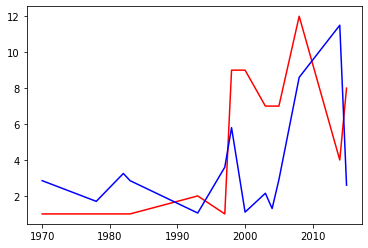

In [16]:
# Western Africa
region_17=(region_data_with_pred[region_data_with_pred['Region']==19]).sort_values(by='Year')
y_real=region_17['number of floods']
y_pred=region_17['predicted number of floods']
y_error=region_17['prediction error']
x_year=region_17['Year']
plt.plot(x_year, y_real, 'r')  
plt.plot(x_year, y_pred, 'b') 
plt.show()

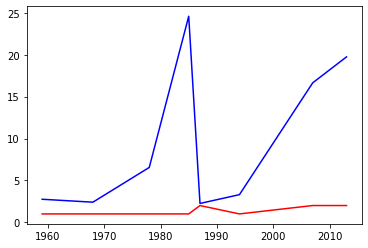

In [17]:
# Southern Africa
region_17=(region_data_with_pred[region_data_with_pred['Region']==16]).sort_values(by='Year')
y_real=region_17['number of floods']
y_pred=region_17['predicted number of floods']
y_error=region_17['prediction error']
x_year=region_17['Year']
plt.plot(x_year, y_real, 'r')  
plt.plot(x_year, y_pred, 'b') 
plt.show()

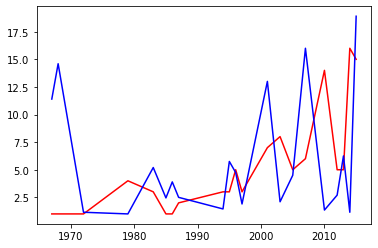

In [18]:
# Southern Europe
region_17=(region_data_with_pred[region_data_with_pred['Region']==18]).sort_values(by='Year')
y_real=region_17['number of floods']
y_pred=region_17['predicted number of floods']
y_error=region_17['prediction error']
x_year=region_17['Year']
plt.plot(x_year, y_real, 'r')  
plt.plot(x_year, y_pred, 'b') 
plt.show()

In [19]:
from scipy import stats
import seaborn as sns
import pingouin as pg

In [20]:
# Correlation test
# Pearson
pearsoncorr = region_17.corr(method='pearson')
print(pearsoncorr)

                            Region      Year  number of floods  \
Region                         NaN       NaN               NaN   
Year                           NaN  1.000000          0.746601   
number of floods               NaN  0.746601          1.000000   
total rainfall MM              NaN  0.680260          0.959828   
predicted number of floods     NaN  0.032389          0.133799   
prediction error               NaN  0.046614          0.466408   

                            total rainfall MM  predicted number of floods  \
Region                                    NaN                         NaN   
Year                                 0.680260                    0.032389   
number of floods                     0.959828                    0.133799   
total rainfall MM                    1.000000                    0.048835   
predicted number of floods           0.048835                    1.000000   
prediction error                     0.493842                    0.340967  

In [21]:
# Spearman
spearmancorr = dataset.corr(method='spearman')
print(spearmancorr)

                                     Year       Seq  Disaster Subsubtype  \
Year                             1.000000  0.325663                  NaN   
Seq                              0.325663  1.000000                  NaN   
Disaster Subsubtype                   NaN       NaN                  NaN   
Aid Contribution                 0.122553  0.016455                  NaN   
Dis Mag Value                    0.335009 -0.033726                  NaN   
Latitude                        -0.023526  0.101695                  NaN   
Longitude                       -0.009137  0.022760                  NaN   
Local Time                            NaN       NaN                  NaN   
Start Year                       0.999997  0.325674                  NaN   
Start Month                     -0.012486  0.562798                  NaN   
Start Day                       -0.035220  0.070596                  NaN   
End Year                         0.999888  0.327753                  NaN   
End Month   

In [22]:
# Kendall
kendallcorr = dataset.corr(method='kendall')
print(kendallcorr)

                                     Year       Seq  Disaster Subsubtype  \
Year                             1.000000  0.220270                  NaN   
Seq                              0.220270  1.000000                  NaN   
Disaster Subsubtype                   NaN       NaN                  NaN   
Aid Contribution                 0.085186  0.010818                  NaN   
Dis Mag Value                    0.236590 -0.023473                  NaN   
Latitude                        -0.019151  0.054344                  NaN   
Longitude                       -0.006646  0.015434                  NaN   
Local Time                            NaN       NaN                  NaN   
Start Year                       0.999971  0.220280                  NaN   
Start Month                     -0.008550  0.446185                  NaN   
Start Day                       -0.024432  0.048348                  NaN   
End Year                         0.998917  0.222063                  NaN   
End Month   

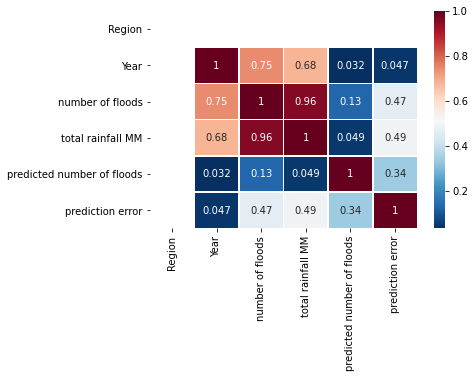

In [23]:
# Correlogram
import seaborn as sns
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [24]:
import pingouin as pg
anova = pg.rm_anova(region_17)
print(anova)

   Source  ddof1  ddof2           F         p-unc     p-GG-corr       np2  \
0  Within      5    100  254.163241  3.496151e-55  7.580432e-13  0.927051   

        eps  sphericity       W-spher        p-spher  
0  0.200214       False  6.414227e-15  8.339293e-116  
